In [3]:
# POPULATION ANALYSIS - TRAINED DATA, no familiarity effect. regulation carries on

# import list
%reload_ext autoreload
%autoreload 2

import os
import pickle
import numpy as np
import pandas as pd
#import main_funcs as mfun
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import glob as glob
from datetime import datetime
from scipy import stats
import plot_funcs as pfun
import statsmodels.api as sm
import statsmodels.formula.api as smf
# from sklearn import preprocessing
# from scipy import stats
# from itertools import compress

import warnings
warnings.filterwarnings("ignore") 

# set matlab API
import matlab.engine
eng = matlab.engine.start_matlab()
print('Matlab engine is set correctly.')
eng.warning('off', 'all', nargout=0)

rootPath = r'C:\Users\Huriye\Documents\code\trainingInducedPlasticity' # IMPORTANT: update the rootPath
analysis_path = os.path.join(rootPath, 'analysis') 
data_path = os.path.join(rootPath, 'info_data')
savefigsPath     = os.path.join(rootPath, 'figs')
backgroundImage_path = os.path.join(rootPath, 'BFimages')

savefigpath = r'G:\My Drive\Manuscripts\1Training4by4paper\TrainingInduced_figures'


Matlab engine is set correctly.


In [3]:
# Plot BF & cortical voronoid maps from matlab code
eng.plotBestFrequencyMaps(savefigpath,  nargout=0) # run matlab code to get BF plots
eng.corticalMap(backgroundImage_path, savefigpath, nargout=0) # run matlab code to cortical maps

In [5]:
# Plot PPF control figure/ permutation  from matlab code
eng.plot_PPF_Permutation(savefigpath,  nargout=0) # run matlab code to get BF plots
eng.close('all', nargout=0)

In [135]:
# Figure 2: Timbre Feature Exploration
pfun.set_figure(size='double')
fig = plt.figure(constrained_layout=False, figsize=(16, 12))

# set gridspecs
gs_behavior  = fig.add_gridspec(ncols=2, nrows=1, bottom=0.77, top=0.95, right=0.38, left=0.05,
                              wspace=0.4, hspace=0.4)
gs_map       = fig.add_gridspec(ncols=1, nrows=1, bottom=0.35, top=0.70, right=0.38, left=0.05,
                              wspace=0.2, hspace=0.4) # Leave empty space for cortical map created by MATLAB Code
gs_timbreSSA = fig.add_gridspec(ncols=1, nrows=1, bottom=0.05, top=0.30, right=0.38, left=0.05,
                              wspace=0.2, hspace=0.4)

vowel_samples = fig.add_gridspec(ncols=2, nrows=1, bottom=0.77, top=0.95, right=0.85, left=0.45,
                              wspace=0.3, hspace=0.4)
gs_f2SSA      = fig.add_gridspec(ncols=1, nrows=1, bottom=0.47, top=0.70, right=0.85, left=0.45,
                              wspace=0.2, hspace=0.4)
gs_timbreSSA_acrossfields = fig.add_gridspec(ncols=1, nrows=4, bottom=0.05, top=0.40, right=0.85, left=0.45,
                                wspace=0.2, hspace=0)

# Panel A - B:  plot behaviour results: A - B
ax_gs_behavior = {xx: fig.add_subplot(gs_behavior[xx]) for xx in range(2)}
pfun.plotBehaviorTimbre (ax_gs_behavior )

# Panel C: plot timbre auditory cortex maps : tHIS WILL BE A SEPARATE FIGURE - created by Matlab code above
# Panel D: plot timbre SSA
ax_gs_timbreSSA = {xx: fig.add_subplot(gs_timbreSSA[xx]) for xx in range(1)}
pfun.plotSSAacrossfields (eng,  'Timbre', ax_gs_timbreSSA[0] )

# Panel E: plot vowel samples
ax_vowel_samples = {xx: fig.add_subplot(vowel_samples[xx]) for xx in range(2)}
pfun.plotVowelSamples (ax_vowel_samples )

# Panel F: plot F2 SSA
ax_gs_f2SSA = {xx: fig.add_subplot(gs_f2SSA[xx]) for xx in range(1)}
pfun.plotVowelSSA (eng, 'Timbre',ax_gs_f2SSA )

# Panel G: plot timbre SSA across fields
ax_gs_timbreSSA_acrossfields = {xx: fig.add_subplot(gs_timbreSSA_acrossfields[xx]) for xx in range(4)}
pfun.plotVowelSSAacrossfields (eng,  'Timbre', 'A1', ax_gs_timbreSSA_acrossfields[0] )
pfun.plotVowelSSAacrossfields (eng,  'Timbre', 'AAF', ax_gs_timbreSSA_acrossfields[1] )
pfun.plotVowelSSAacrossfields (eng,  'Timbre', 'PPF', ax_gs_timbreSSA_acrossfields[2] )
pfun.plotVowelSSAacrossfields (eng,  'Timbre', 'PSF', ax_gs_timbreSSA_acrossfields[3] )

# List of your gridspecs
axes = [ax_gs_behavior, ax_gs_timbreSSA, ax_vowel_samples, ax_gs_f2SSA, ax_gs_timbreSSA_acrossfields]

# Corresponding labels
labels = ['A','B', 'D', 'E','F','G','H' ]
lInd = 0

for ax, label in zip(axes, labels):
    for key in ax:
        if lInd<2:
            ax[key].text(-0.3, 1.1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        elif lInd>1 and lInd<7:
            ax[key].text(-0.1, 1.1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        lInd += 1
plt.tight_layout()
savefigname = 'Figure2_TimbreRepresentation'
pfun.save_figure(savefigname,savefigpath)
plt.close()

# Mixed Effect Model
all_data = pfun.generateDataValuesForMixedEffectModel(eng)
#formula = "Value ~ C(TrainingGroup)*C(VowelPair)*C(Field)"
formula = "Value ~ C(TrainingGroup) * Field *F1 *F2"
mixed_effects_model = smf.mixedlm(formula, all_data, groups=all_data['Unit'])

# Fit the model
mixed_effects_result = mixed_effects_model.fit()

# Print the summary
print(mixed_effects_result.summary())
# Convert the summary result to HTML
summary = mixed_effects_result.summary()
summary_html = summary.as_html()

# Write the HTML string to a file
saveName = savefigpath + '\\Figure2-Timbre-GLMM-summary.html'
with open(saveName, 'w') as f:
    f.write(summary_html)
    

                          Mixed Linear Model Regression Results
Model:                        MixedLM           Dependent Variable:           Value      
No. Observations:             7578              Method:                       REML       
No. Groups:                   434               Scale:                        69.9055    
Min. group size:              6                 Log-Likelihood:               -27488.0662
Max. group size:              24                Converged:                    Yes        
Mean group size:              17.5                                                       
-----------------------------------------------------------------------------------------
                                              Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------------------------------
Intercept                                      2.232    1.547  1.443 0.149  -0.800  5.264
C(TrainingGroup)[T.Pitch]           

OSError: [Errno 22] Invalid argument: 'G:\\My Drive\\Manuscripts\\1Training4by4paper\\TrainingInduced_figures\timbre-GLMM-summary.html'

                          Mixed Linear Model Regression Results
Model:                        MixedLM           Dependent Variable:           Value      
No. Observations:             7578              Method:                       REML       
No. Groups:                   434               Scale:                        69.9055    
Min. group size:              6                 Log-Likelihood:               -27488.0662
Max. group size:              24                Converged:                    Yes        
Mean group size:              17.5                                                       
-----------------------------------------------------------------------------------------
                                              Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------------------------------
Intercept                                      2.232    1.547  1.443 0.149  -0.800  5.264
C(TrainingGroup)[T.Pitch]           

In [132]:
all_data.shape

(7578, 7)

In [128]:
control_data = np.array(eng.prepareTimbreData('Control','Timbre', nargout=1))
control_data[control_data[:, 6] == 1, 3]
                


array([ 1.55654751e+00,  1.21444950e-01,  1.71119411e+00,  3.40188814e+00,
        1.09203452e+01,  2.70550797e+00, -1.15696745e+00,  2.80833068e+00,
        7.82644740e-03, -3.26660916e-01,  8.26616881e+00,  8.26616881e+00,
       -3.26660916e-01,  4.54255650e-02, -2.09387866e-01,  4.54255650e-02,
        8.66077183e+00,  5.15228404e+00,  3.49218897e-01,  1.18615267e+00,
        1.18615267e+00,  8.36677441e-01, -2.33635832e-01,  5.94166520e-01,
        5.94166520e-01,  5.07751254e-01,  3.78188774e-01, -1.74010049e-01,
        1.08918230e+00, -7.76341956e-01,  1.57284154e-01,  2.30959352e+01,
        2.18613057e+01,  3.74987461e+01,  6.97578193e-01,  2.82811254e+01,
        1.85322446e-01,  5.11917748e-02,  1.20347758e+01,  3.91721173e-01,
       -3.80453144e-01,  4.31735832e+00,  4.07508151e+00,  3.24645143e+00,
        1.46770637e+00,  4.30685524e+00,  1.49369356e-01, -6.42450735e-01,
        2.52748403e+00,  2.78708074e+00,  4.84473891e-01,  1.22102866e+00,
       -2.67466062e-01, -

In [65]:
# Figure 3: Pitch/F0 Feature Exploration
pfun.set_figure(size='double')
fig = plt.figure(constrained_layout=False, figsize=(16, 12))

# set gridspecs
gs_behavior  = fig.add_gridspec(ncols=2, nrows=1, bottom=0.77, top=0.95, right=0.38, left=0.05,
                              wspace=0.4, hspace=0.4)
gs_map       = fig.add_gridspec(ncols=1, nrows=1, bottom=0.35, top=0.70, right=0.38, left=0.05,
                              wspace=0.2, hspace=0.4)# Leave empty space for cortical map created by MATLAB Code
gs_pitchSSA = fig.add_gridspec(ncols=1, nrows=1, bottom=0.05, top=0.30, right=0.38, left=0.05,
                              wspace=0.2, hspace=0.4)

# Panel A - B:  plot behaviour results: A - B
ax_gs_behavior = {xx: fig.add_subplot(gs_behavior[xx]) for xx in range(2)}
pfun.plotBehaviorPitch (ax_gs_behavior )

# Panel C: plot pitch auditory cortex maps : tHIS WILL BE A SEPARATE FIGURE
# Panel D: plot pitch SSA
ax_gs_pitchSSA = {xx: fig.add_subplot(gs_pitchSSA[xx]) for xx in range(1)}
pfun.plotSSAacrossfields (eng,  'F0', ax_gs_pitchSSA[0] )

# List of your gridspecs
axes = [ax_gs_behavior, ax_gs_pitchSSA]

# Corresponding labels
labels = ['A','B', 'D']
lInd = 0
for ax, label in zip(axes, labels):
    for key in ax:
        if lInd<2:
            ax[key].text(-0.3, 1.1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        else:
            ax[key].text(-0.1, 1.1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                    fontweight='bold', va='top', ha='right',
                    bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        lInd += 1
plt.tight_layout()
savefigname = 'Figure3_PitchRepresentation'
pfun.save_figure(savefigname,savefigpath)
plt.close()


In [62]:
# Figure 4: Space Feature Exploration
pfun.set_figure(size='double')
fig = plt.figure(constrained_layout=False, figsize=(16, 12))

# set gridspecs

gs_map       = fig.add_gridspec(ncols=1, nrows=1, bottom=0.35, top=0.70, right=0.38, left=0.05,
                              wspace=0.2, hspace=0.4)# Leave empty space for cortical map created by MATLAB Code above
gs_spaceSSA = fig.add_gridspec(ncols=1, nrows=1, bottom=0.05, top=0.30, right=0.38, left=0.05,
                              wspace=0.2, hspace=0.4)
gs_spaceSpikeRates = fig.add_gridspec(ncols=3, nrows=1, bottom=0.40, top=0.70, right=0.85, left=0.43,
                              wspace=0.4, hspace=0.2)
gs_spaceGLM = fig.add_gridspec(ncols=1, nrows=1, bottom=0.05, top=0.30, right=0.85, left=0.70,
                              wspace=0.2, hspace=0)


# Panel A: plot pitch auditory cortex maps : THIS WILL BE A SEPARATE FIGURE created by MATLAB code above
# Panel B: plot pitch SSA
ax_gs_spaceSSA = {xx: fig.add_subplot(gs_spaceSSA[xx]) for xx in range(1)}
pfun.plotSSAacrossfields (eng,  'Space', ax_gs_spaceSSA[0] )

# Panel C: normalisation panels
ax_gs_spaceSpikeRates = {xx: fig.add_subplot(gs_spaceSpikeRates[xx]) for xx in range(3)}
pfun.plotSRNormalisation (eng,  'Space', ax_gs_spaceSpikeRates )

# Panel D: GLM panels
ax_gs_spaceGLM = {xx: fig.add_subplot(gs_spaceGLM[xx]) for xx in range(1)}
pfun.plotCoefForGLMM ( eng, 'Space', ax_gs_spaceGLM[0], savefigpath)

# Lets add the labels
axes = [ax_gs_spaceSSA, ax_gs_spaceSpikeRates, ax_gs_spaceGLM]
labels = ['B','C', 'D', 'E','F']
lInd = 0
for ax, label in zip(axes, labels):
    for key in ax:
        if lInd==0:
            ax[key].text(-0.05, 1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        elif (lInd>0 and lInd<4):
            ax[key].text(-0.3, 1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        elif lInd>3:
            ax[key].text(-2,1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        lInd += 1
plt.tight_layout()
savefigname = 'Figure4_SpaceRepresentation'
pfun.save_figure(savefigname,savefigpath)
plt.close()



                                 Mixed Linear Model Regression Results
Model:                             MixedLM                Dependent Variable:                spike_rate
No. Observations:                  4540                   Method:                            REML      
No. Groups:                        1135                   Scale:                             0.1889    
Min. group size:                   4                      Log-Likelihood:                    -5841.9362
Max. group size:                   4                      Converged:                         Yes       
Mean group size:                   4.0                                                                 
-------------------------------------------------------------------------------------------------------
                                                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------------------

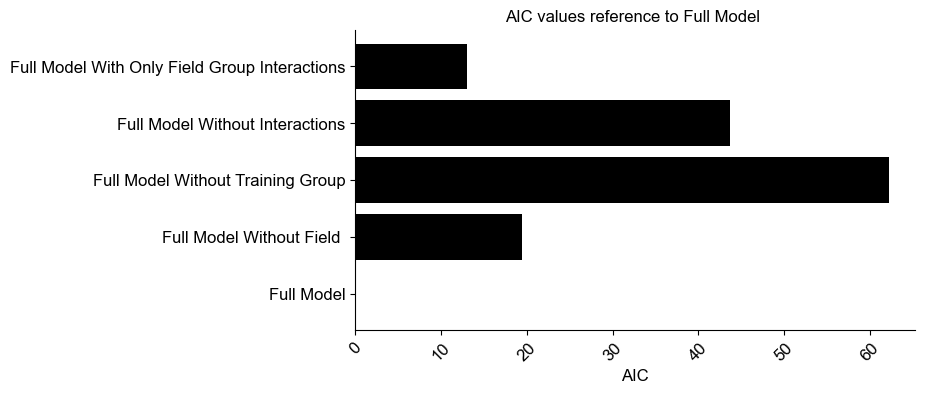

In [61]:
#### Supplementar figure for space
pfun.set_figure(size='double')
fig = plt.figure(constrained_layout=False, figsize=(16, 12))
gs_validation  = fig.add_gridspec(ncols=1, nrows=1, bottom=0.70, top=0.95, right=0.40, left=0.05,
                              wspace=0.4, hspace=0.4)
# Panel A - Only panel
ax_gs_validation = {xx: fig.add_subplot(gs_validation[xx]) for xx in range(1)}
cv = pfun.plotValidationForGLMM ( eng, 'Space', ax_gs_validation[0], savefigpath)
plt.tight_layout()
savefigname = 'Figure4_SupplementaryModelValidation'
pfun.save_figure(savefigname,savefigpath)
plt.close()

In [48]:
df = pfun.generateDataForGLMM(eng, 'Space')

In [53]:
df['spike_rate']

0        1.286316
1        1.164905
2        1.331224
3        1.656118
4        1.955789
5        2.221987
6        2.177215
7        2.234177
8        0.865471
9        0.822823
10       0.818591
11       0.893713
12      14.793722
13      15.057057
14      14.685157
15      14.544910
16       2.121076
17       2.154655
18       2.215892
19       2.528443
20       0.868460
21       0.873874
22       1.022489
23       1.109281
24       3.600000
25       3.782241
26       3.902954
27       4.255274
28       1.849028
29       1.932432
30       2.053973
31       2.311377
32       3.565022
33       3.557057
34       3.895052
35       4.104790
36       1.358744
37       1.555556
38       1.578711
39       1.645210
40       3.751868
41       3.798799
42       3.949025
43       4.184132
44       3.751868
45       3.798799
46       3.949025
47       4.184132
48       1.358744
49       1.555556
50       1.578711
51       1.645210
52       0.922272
53       1.055556
54       1.061469
55       1

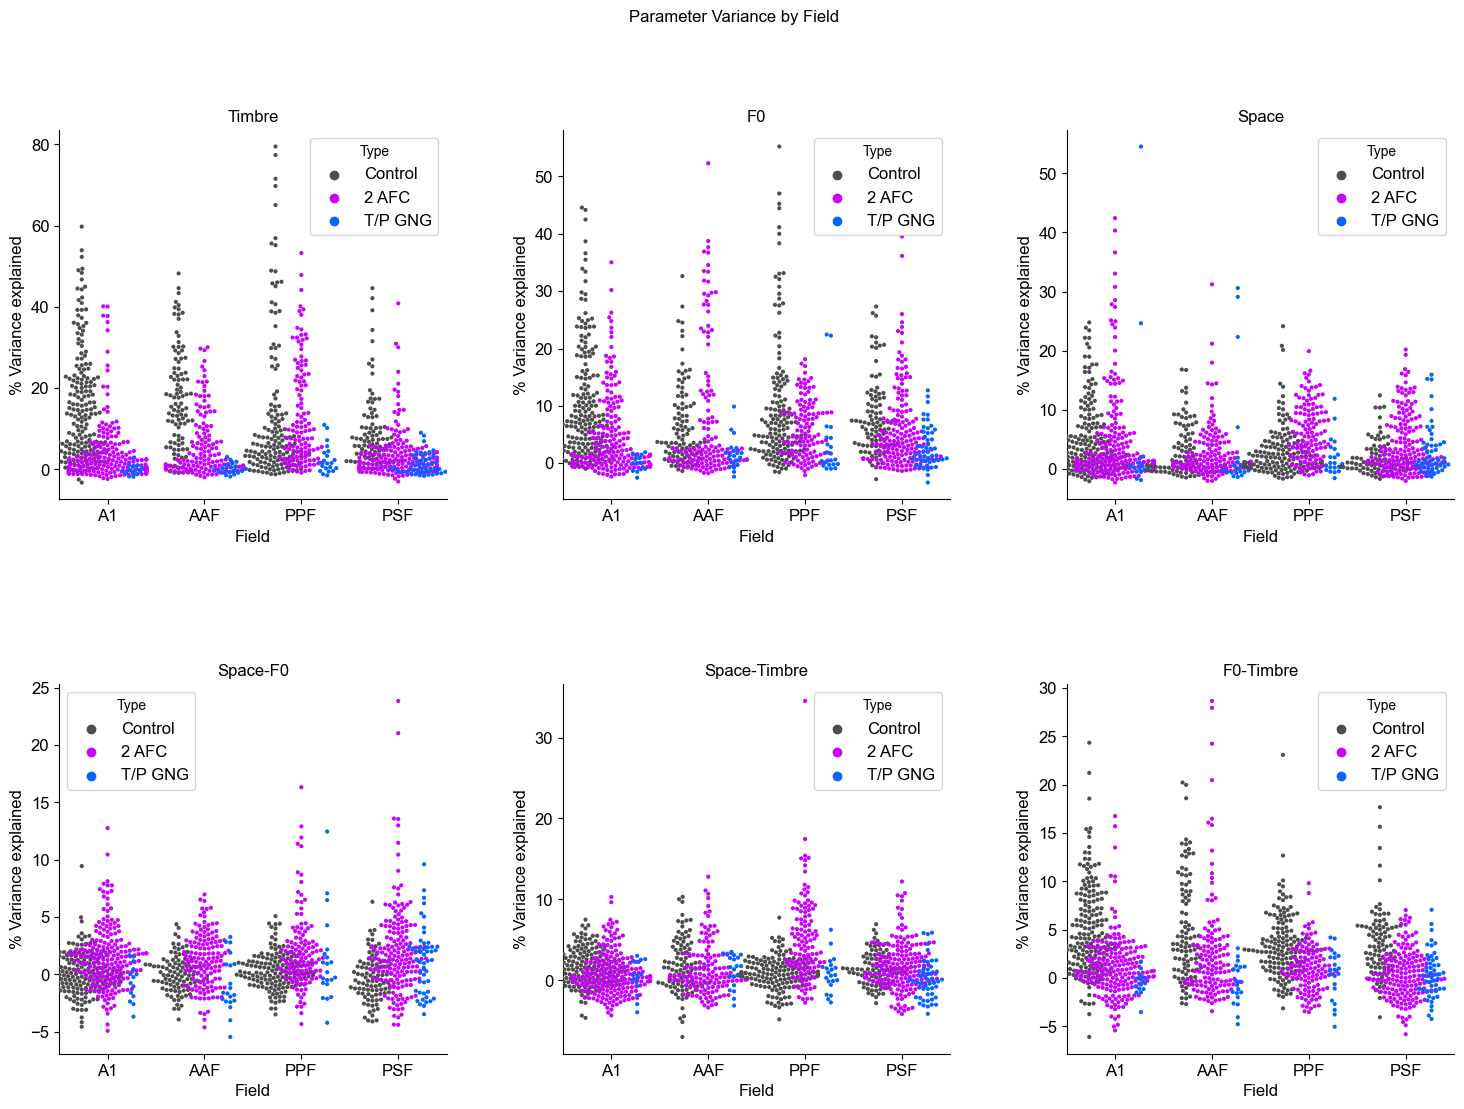

In [9]:
## Extra: Create the boxplots = Across  different parameters

# Get data from Matlab structure in numpy arrays
timbre_data = np.array(eng. prepareSSAData('Timbre', nargout=1))
pitch_data = np.array(eng. prepareSSAData('Pitch', nargout=1))
control_data = np.array(eng. prepareSSAData('Control', nargout=1))

# Define the fields and their corresponding codes in column 7 of the data
fields = {1: 'A1', 2: 'AAF', 3: 'PPF', 4: 'PSF'}

# Define the auditory features 
range_names = ['Timbre', 'F0', 'Space', 'Space-F0', 'Space-Timbre', 'F0-Timbre']
colors =[(0.3, 0.3, 0.3), (0.8, 0, 1), (0, 0.4, 1)]

# Create the figure and axes
fig, axs = plt.subplots(2, 3, figsize=(18, 12)) # Adjust the size as needed
axs = axs.flatten() # Flatten the array to make it easier to index
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Iterate over the ranges and fields to plot
for i, range_name in enumerate(range_names):
    ax = axs[i]

    # We will collect the box plot data and positions here
    box_data = []

    # Prepare data for boxplot for each field
    for j, (field_code, field_name) in enumerate(fields.items(), start=1):
        # Check if there is data for the given field in the Control dataset
        if np.any(control_data[:, 6] == field_code):
            df = pd.DataFrame()
            df['Value'] = control_data[control_data[:, 6] == field_code, i]
            df['Type'] = 'Control'
            df['Field'] = field_name
            box_data.append(df)

        # Check if there is data for the given field in the Timbre dataset
        if np.any(timbre_data[:, 6] == field_code):
            df = pd.DataFrame()
            df['Value'] = timbre_data[timbre_data[:, 6] == field_code, i]
            df['Type'] = '2 AFC'
            df['Field'] = field_name
            box_data.append(df)

        # Check if there is data for the given field in the Pitch dataset
        if np.any(pitch_data[:, 6] == field_code):
            df = pd.DataFrame()
            df['Value'] = pitch_data[pitch_data[:, 6] == field_code, i]
            df['Type'] = 'T/P GNG'
            df['Field'] = field_name
            box_data.append(df)

    # Concatenate all dataframes
    all_data = pd.concat(box_data)

    # Plot the boxplot using seaborn
    sns.swarmplot(x='Field', y='Value', hue='Type', data=all_data, palette=colors, ax=ax, size = 3, dodge=True)
    #boxplot(x='Field', y='Value', hue='Type', data=all_data, palette=colors, ax=ax, showfliers=False )
    # Set the title for each subplot
    ax.set_title(range_name)

    # Set the y-axis label
    ax.set_ylabel('% Variance explained')
    

# Set a super title for the entire figure
plt.suptitle('Parameter Variance by Field')
plt.show()

plt.tight_layout()
savefigname = 'SSA_swarmplots'
pfun.save_figure(savefigname,savefigpath)
plt.close()


In [ ]:
# Completed : All figures are saved in the savefigpath folder.